In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from data_processor import DataProcessor


In [3]:
# Set plotting style
sns.set_palette("husl")

In [4]:
# Fetch data
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

In [5]:
# Fetch data for all tickers
data_dict = fetch_stock_data(tickers, start_date, end_date)


Analyzing TSLA

Basic Statistics:


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\notebook\../src\data_processor.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data = self.data.fillna(method='ffill')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.0,2535.000000
mean,117.877662,120.474827,115.097514,117.848209,1.120308e+08,0.0,0.003156
std,116.611575,119.236025,113.698930,116.508288,7.387509e+07,0.0,0.115791
min,9.488000,10.331333,9.403333,9.578000,1.062000e+07,0.0,0.000000
25%,17.259334,17.527667,16.942000,17.228000,6.680295e+07,0.0,0.000000
50%,31.299999,32.329334,29.760000,30.298000,9.264180e+07,0.0,0.000000
75%,222.653336,226.696671,217.061661,221.525002,1.294283e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


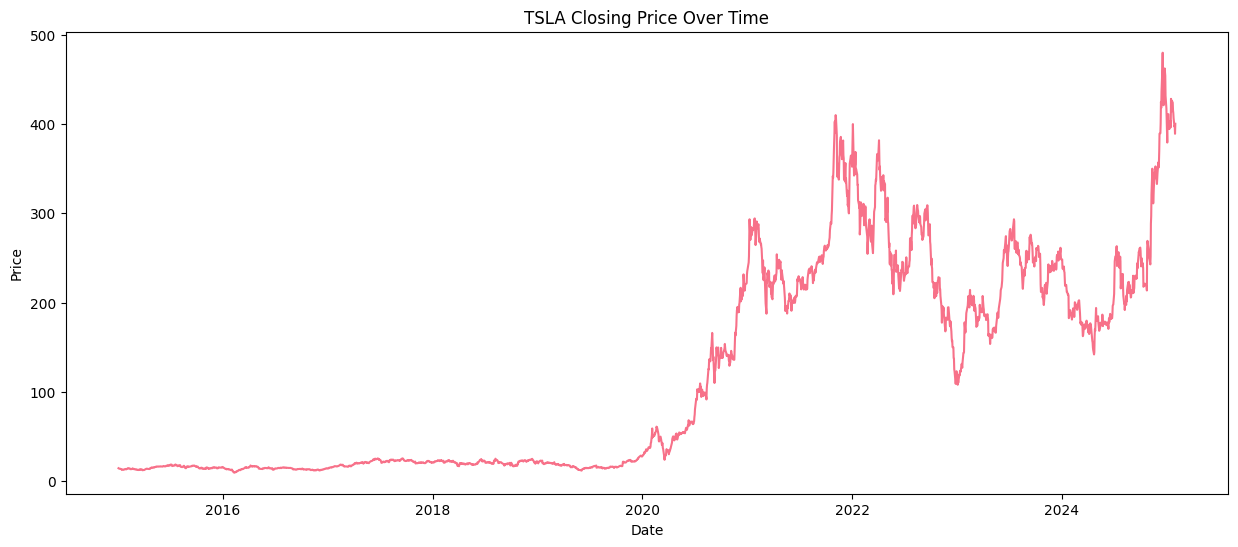

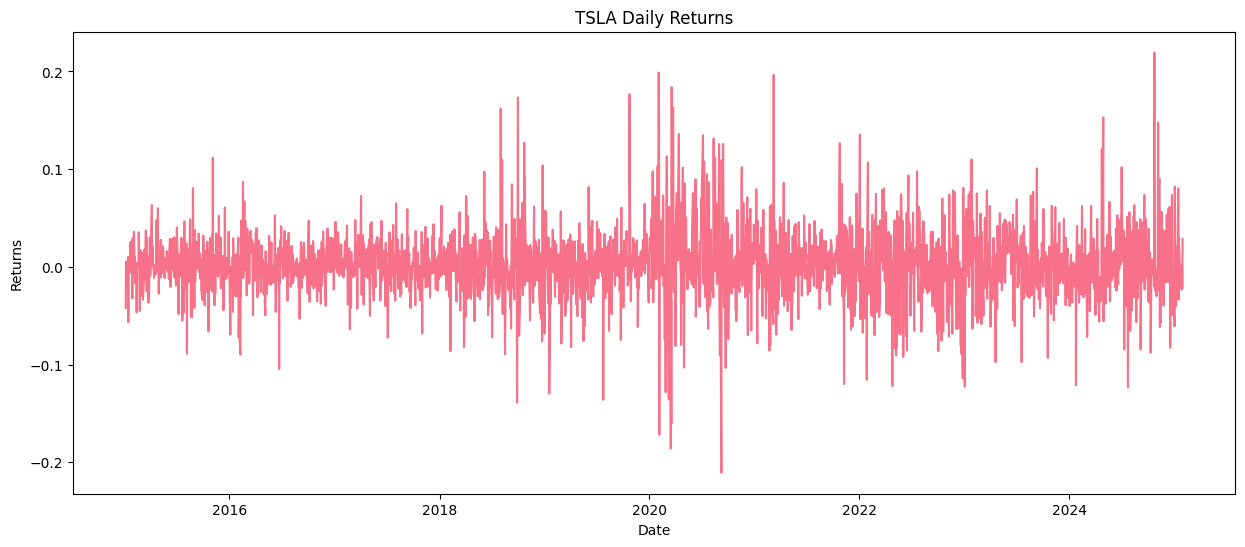

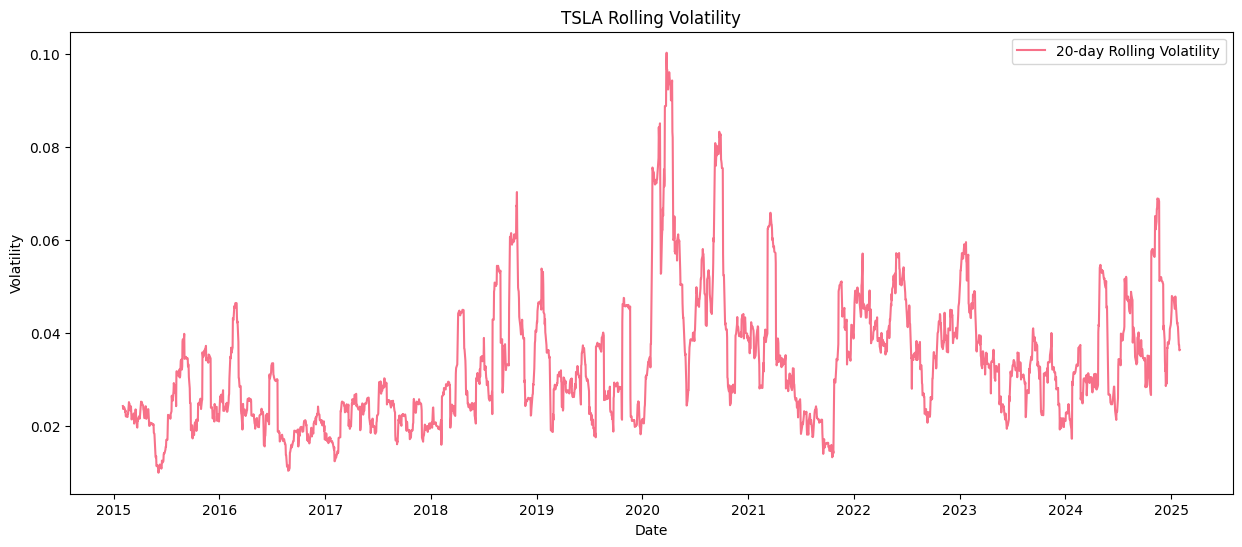

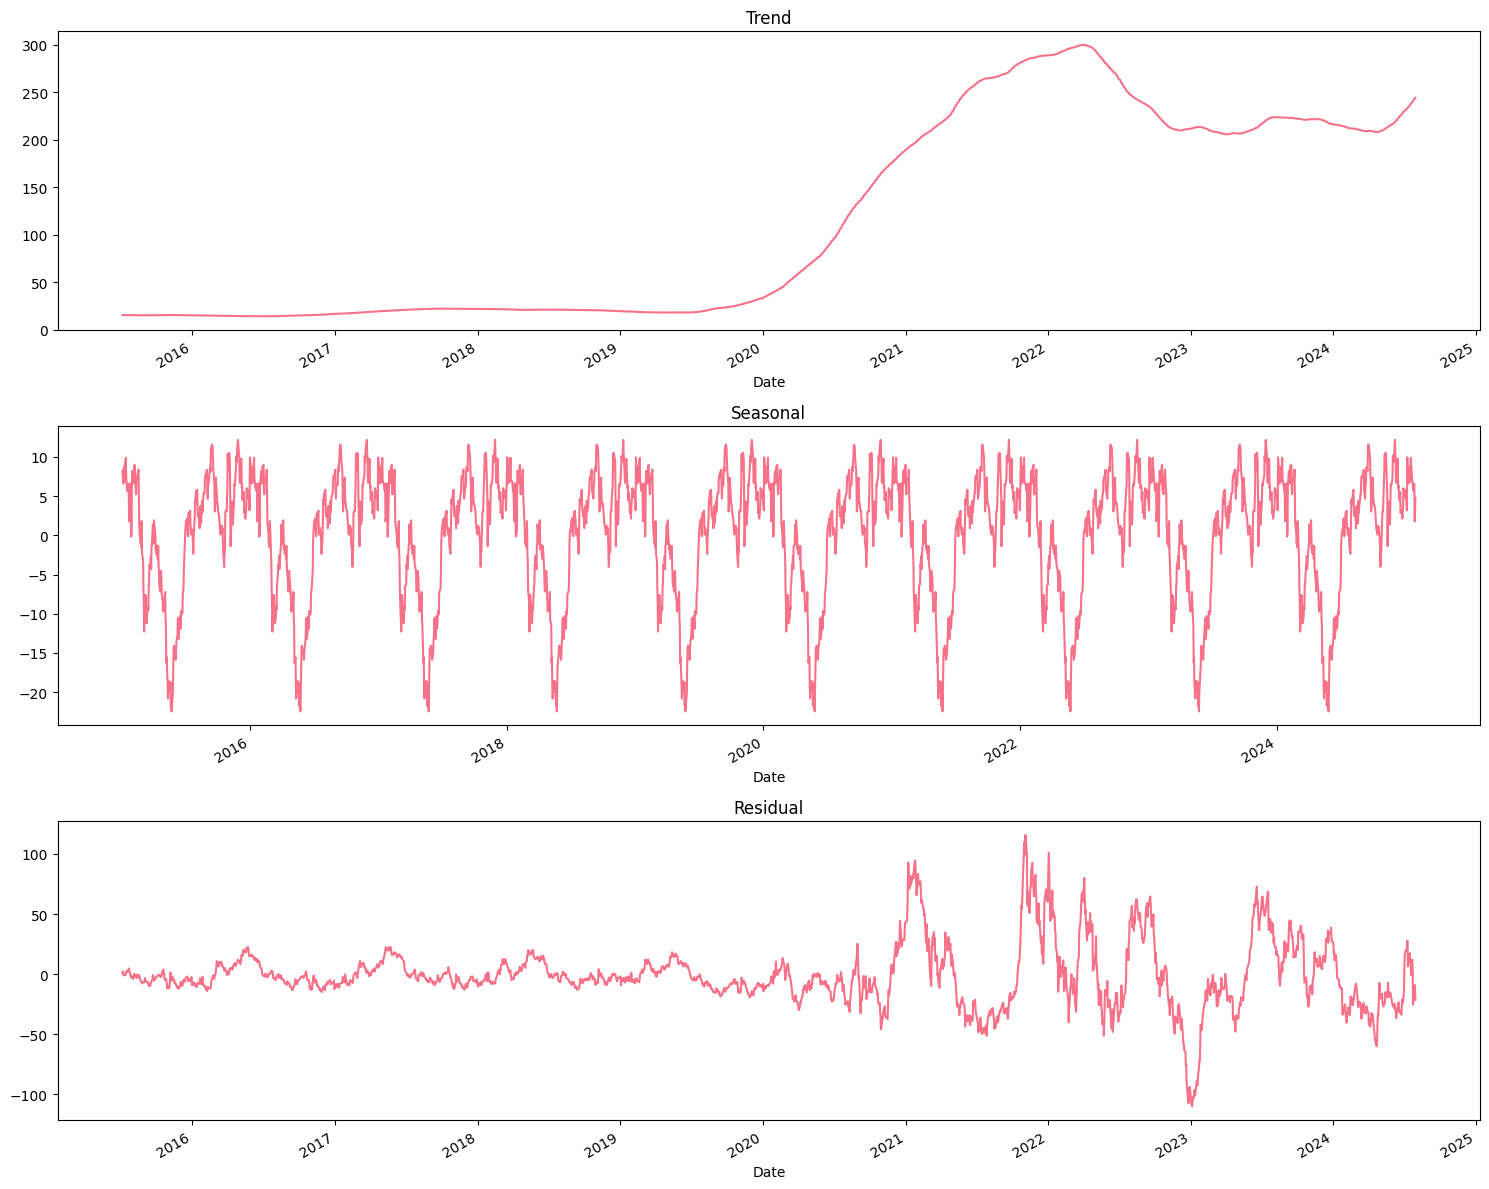


Risk Metrics for TSLA:
Value at Risk (95%): -5.14%
Sharpe Ratio: 0.83

Outliers detected: 1
Top 5 outliers:


Date
2024-12-17 00:00:00-05:00    479.859985
Name: Close, dtype: float64


Analyzing BND

Basic Statistics:


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\notebook\../src\data_processor.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data = self.data.fillna(method='ffill')


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.000000,2535.0,2535.0
mean,69.087206,69.184951,68.980313,69.083444,4.233200e+06,0.008633,0.0,0.0
std,4.778948,4.786136,4.767924,4.777898,2.796083e+06,0.039645,0.0,0.0
min,61.707494,61.753257,61.638865,61.676991,0.000000e+00,0.000000,0.0,0.0
25%,65.357848,65.435044,65.280823,65.370327,2.057700e+06,0.000000,0.0,0.0
50%,68.107136,68.254321,67.967078,68.125984,3.805800e+06,0.000000,0.0,0.0
75%,72.629120,72.729553,72.512564,72.663269,5.626700e+06,0.000000,0.0,0.0
max,78.650397,78.685522,78.553743,78.588875,3.193720e+07,0.369000,0.0,0.0


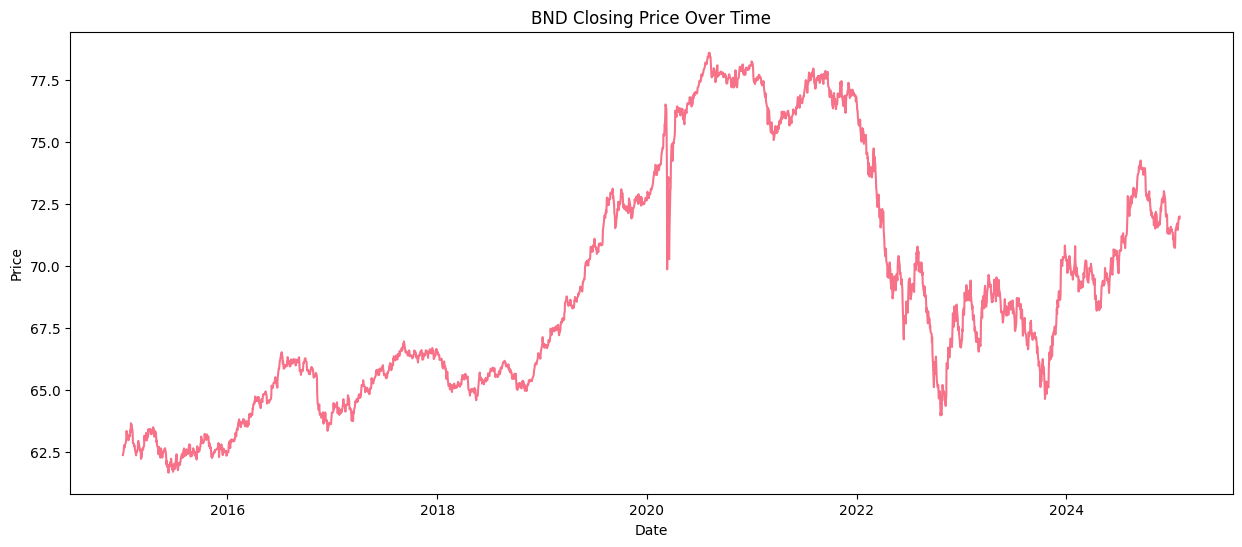

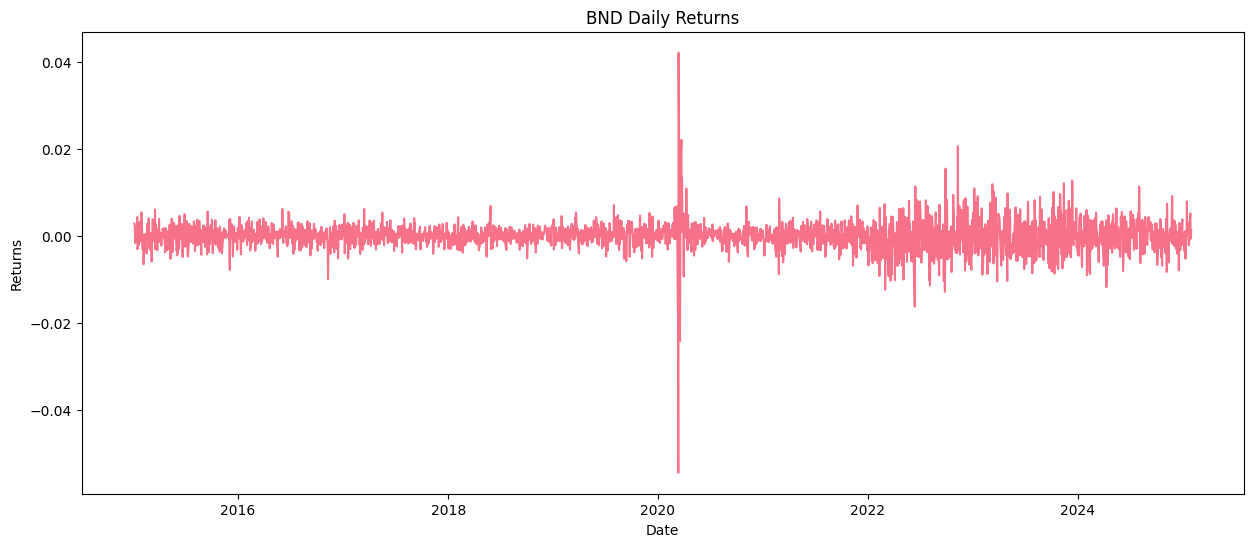

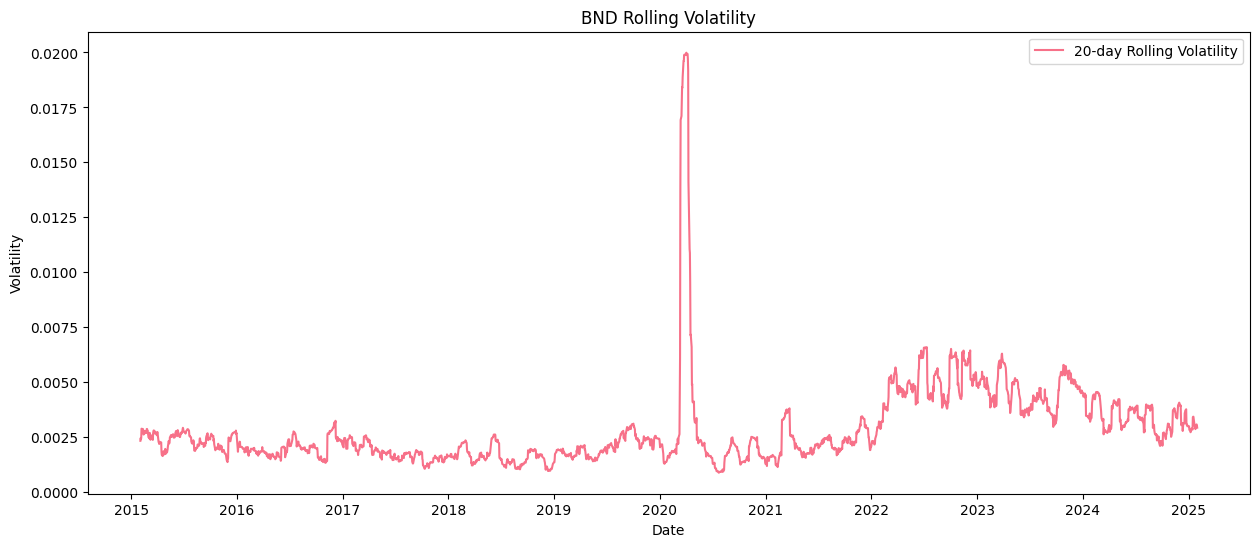

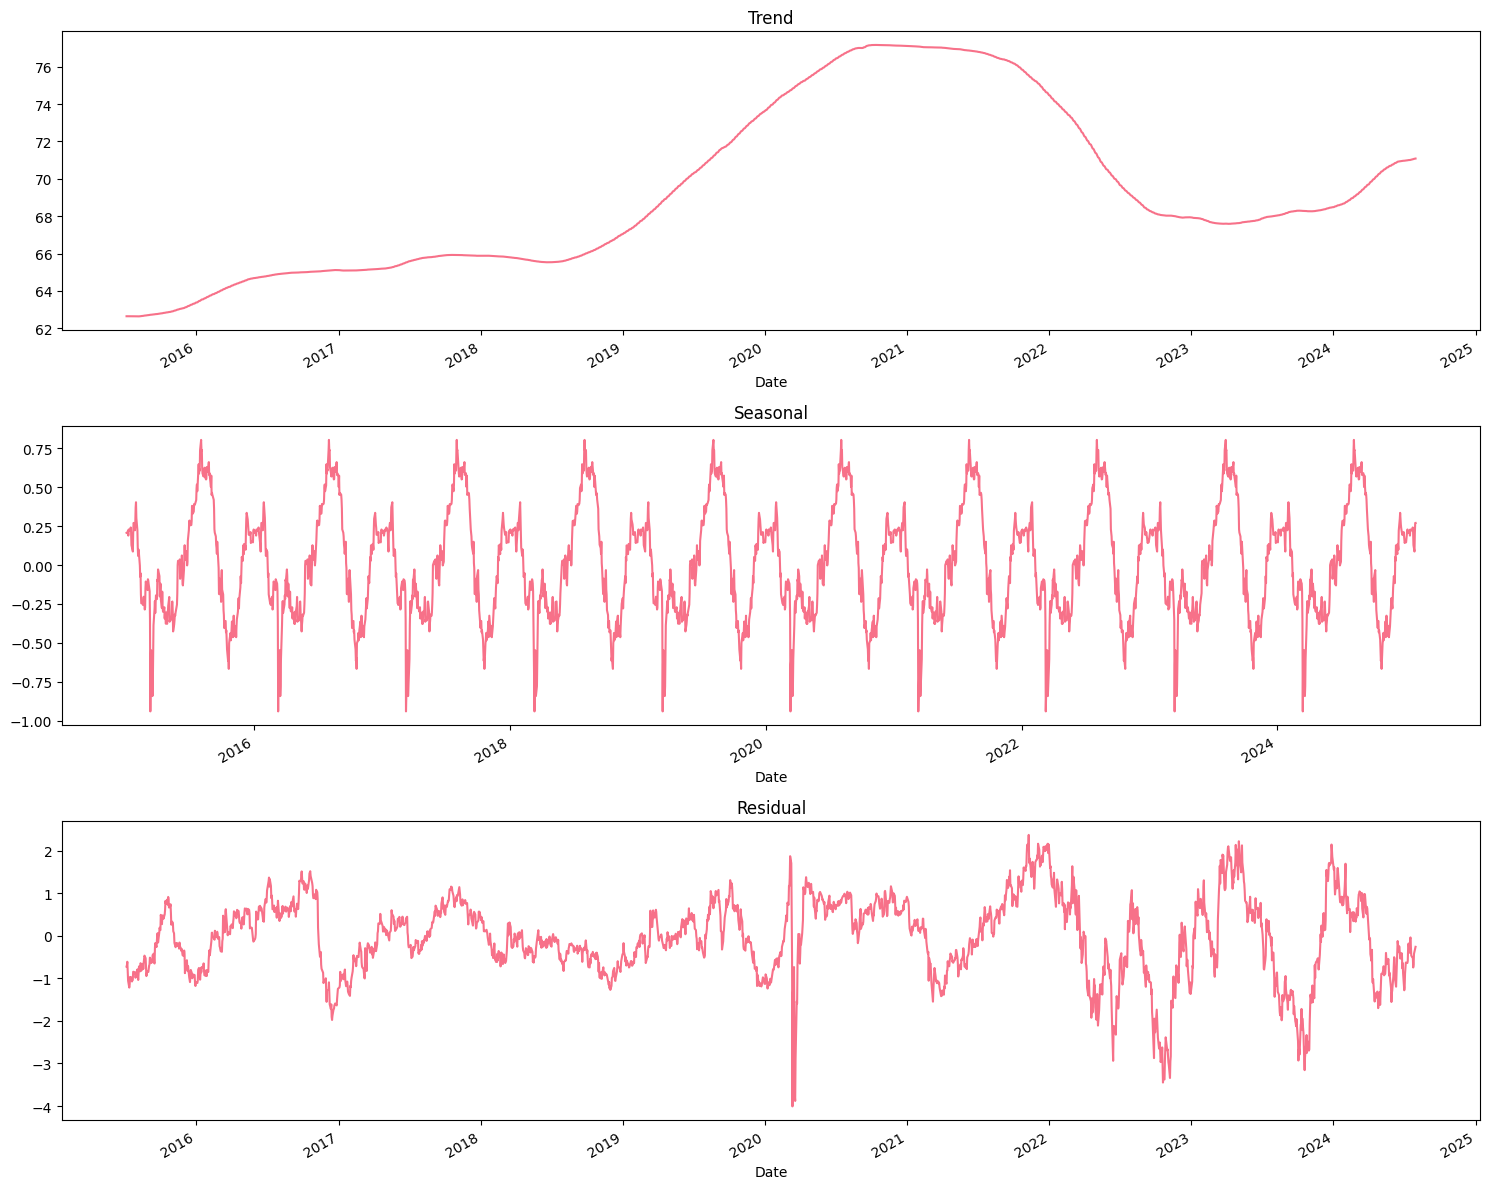


Risk Metrics for BND:
Value at Risk (95%): -0.48%
Sharpe Ratio: -0.08

Outliers detected: 0

Analyzing SPY

Basic Statistics:


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\notebook\../src\data_processor.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data = self.data.fillna(method='ffill')


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.000000,2535.0,2535.0
mean,316.021384,317.725660,314.157889,316.067402,8.714655e+07,0.021969,0.0,0.0
std,117.921619,118.486410,117.269903,117.926910,4.487253e+07,0.176404,0.0,0.0
min,156.354913,157.864105,154.676912,156.800812,2.027000e+07,0.000000,0.0,0.0
25%,214.972515,215.702215,214.206878,214.841995,5.862005e+07,0.000000,0.0,0.0
50%,277.230689,277.919549,276.073581,277.117859,7.642870e+07,0.000000,0.0,0.0
75%,406.100256,409.134325,402.830859,405.869171,1.018866e+08,0.000000,0.0,0.0
max,609.809998,610.780029,606.799988,609.750000,5.072443e+08,1.966000,0.0,0.0


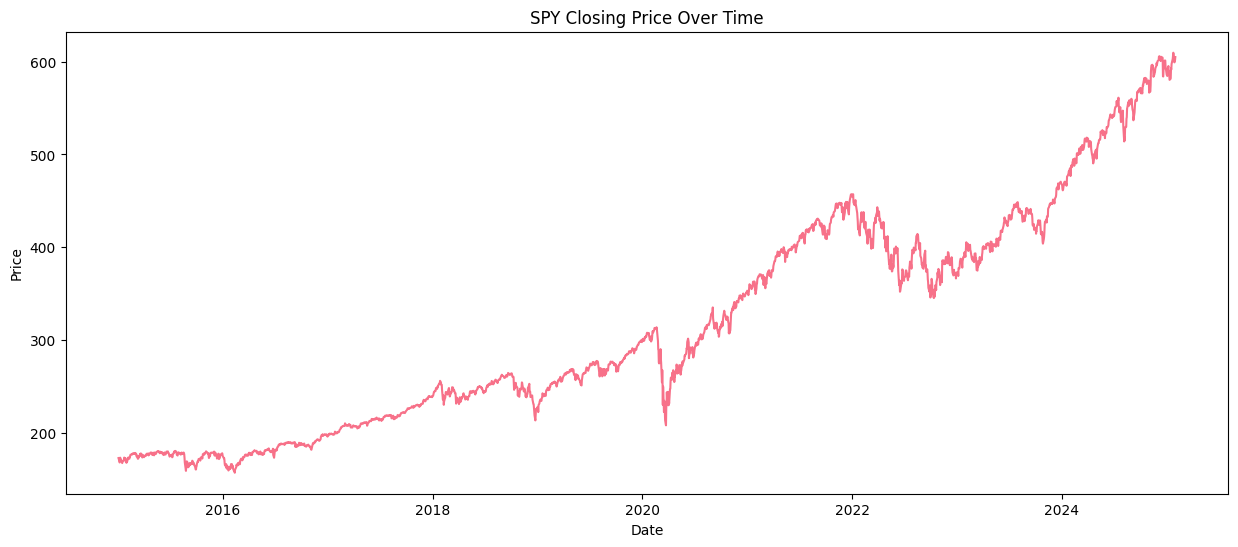

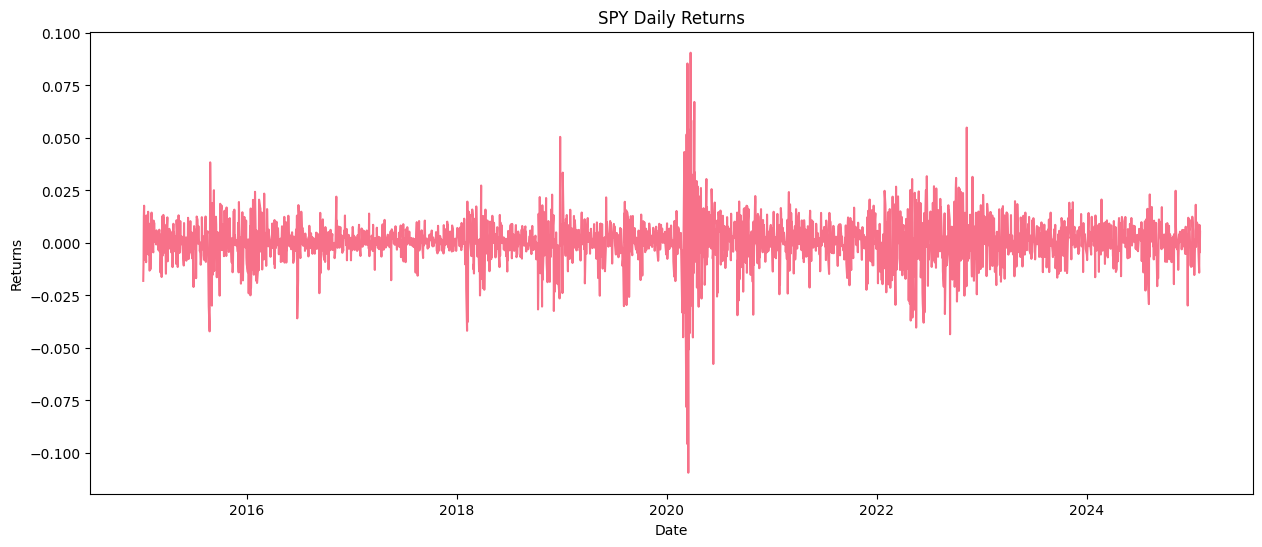

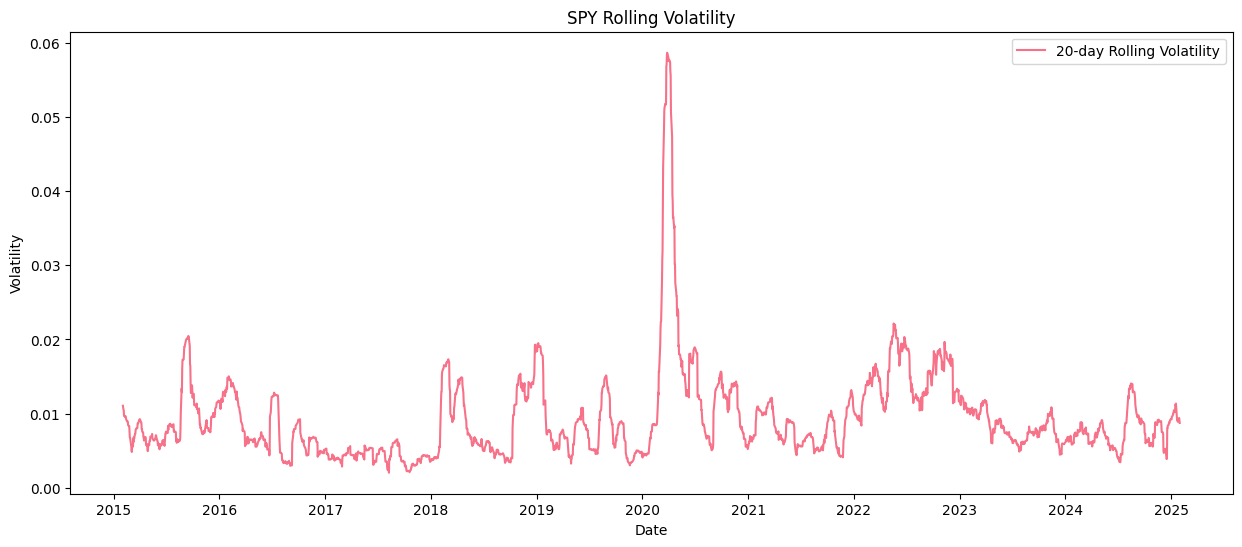

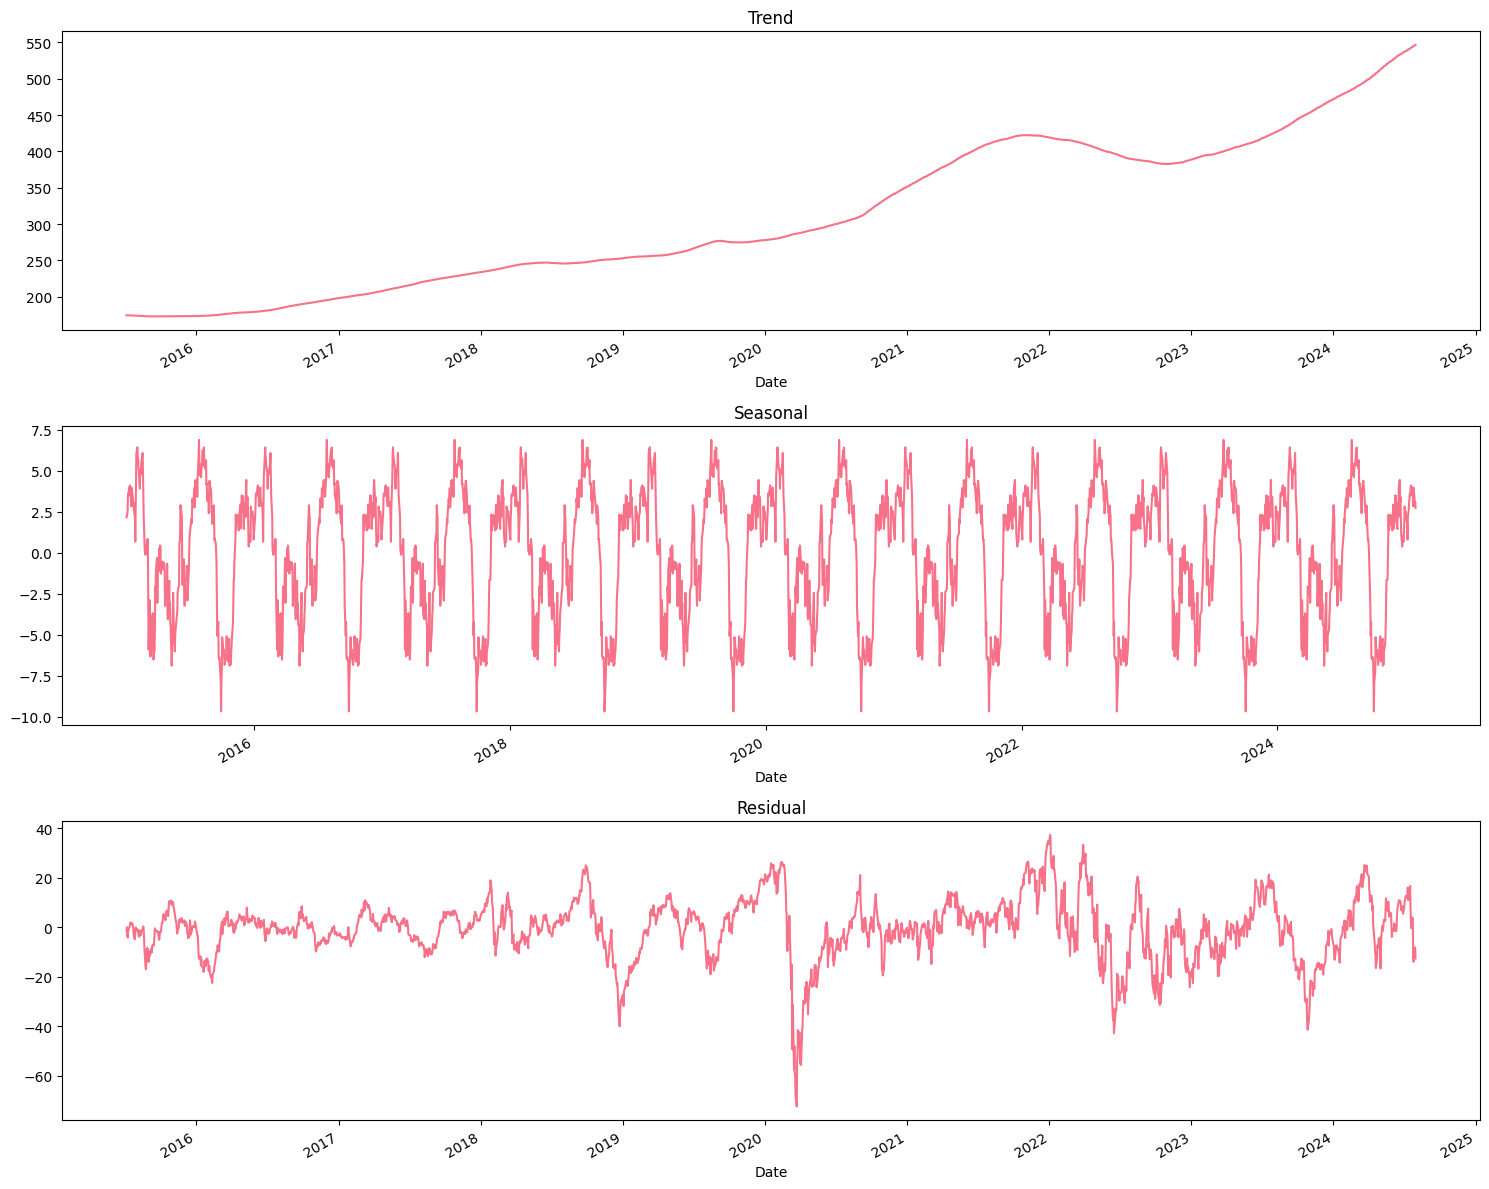


Risk Metrics for SPY:
Value at Risk (95%): -1.67%
Sharpe Ratio: 0.68

Outliers detected: 0


In [9]:
# Process each asset
for ticker in tickers:
    print(f"\nAnalyzing {ticker}")
    
    # Initialize processor
    processor = DataProcessor(data_dict[ticker])
    clean_data = processor.clean_data()
    
    # Basic statistics
    stats = processor.get_basic_stats()
    print("\nBasic Statistics:")
    display(stats['summary'])
    
    # Plot closing prices
    plt.figure(figsize=(15, 6))
    plt.plot(clean_data['Close'])
    plt.title(f'{ticker} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
    # Daily returns
    returns = calculate_daily_returns(clean_data)
    plt.figure(figsize=(15, 6))
    plt.plot(returns)
    plt.title(f'{ticker} Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.show()
    
    # Rolling metrics
    rolling_mean, rolling_std = calculate_rolling_metrics(clean_data)
    
    plt.figure(figsize=(15, 6))
    plt.plot(rolling_std, label='20-day Rolling Volatility')
    plt.title(f'{ticker} Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

    # Decomposition
    decomp = processor.decompose_time_series()
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
    decomp['trend'].plot(ax=ax1)
    ax1.set_title('Trend')
    decomp['seasonal'].plot(ax=ax2)
    ax2.set_title('Seasonal')
    decomp['residual'].plot(ax=ax3)
    ax3.set_title('Residual')
    plt.tight_layout()
    plt.show()

    # Risk metrics
    var = calculate_var(returns)
    sharpe = calculate_sharpe_ratio(returns)
    
    print(f"\nRisk Metrics for {ticker}:")
    print(f"Value at Risk (95%): {var:.2%}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    
    # Outlier detection
    outliers = processor.detect_outliers()
    print(f"\nOutliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print("Top 5 outliers:")
        display(outliers.head())

